In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
import torch
from torchviz import make_dot
#!brew install graphbiz    # Only for Mac Users

## Forward and Backward pass without autograd (manually)

Example derived from: https://github.com/jcjohnson/pytorch-examples#pytorch-autograd

In [5]:
device = torch.device('cpu')

In [6]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

In [7]:
# random input and output data
x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)

# Random init of weights
w1 = torch.randn(D_in, H, device=device)
w2 = torch.randn(H, D_out, device=device)

In [8]:
learning_rate = 1e-6

for epoch in range(300):
    # Forward Pass
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)
    
    # Compute the loss
    loss = (y_pred - y).pow(2).sum()  # scalar
    print(epoch, loss.item())
    
    # Back propagation: 
    # compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h<0] = 0
    grad_w1 = x.t().mm(grad_h)
    
    # grad update using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2


0 29949612.0
1 25595168.0
2 26321216.0
3 27871164.0
4 27010986.0
5 22312336.0
6 15352193.0
7 9116496.0
8 5017470.5
9 2794337.0
10 1676286.0
11 1113936.25
12 812663.8125
13 635025.75
14 518480.34375
15 434789.125
16 370546.40625
17 319081.75
18 276744.46875
19 241341.734375
20 211421.78125
21 185913.8125
22 164043.96875
23 145211.140625
24 128929.328125
25 114784.65625
26 102455.15625
27 91675.109375
28 82216.21875
29 73892.671875
30 66548.359375
31 60050.40625
32 54288.828125
33 49166.5234375
34 44602.78515625
35 40531.5859375
36 36889.796875
37 33624.890625
38 30693.49609375
39 28056.873046875
40 25680.9296875
41 23538.6875
42 21601.06640625
43 19846.34765625
44 18254.6484375
45 16809.12109375
46 15494.111328125
47 14296.0419921875
48 13203.654296875
49 12206.4150390625
50 11294.3505859375
51 10459.73828125
52 9695.181640625
53 8993.875
54 8349.9814453125
55 7758.34619140625
56 7214.31640625
57 6713.3505859375
58 6251.5947265625
59 5825.9609375
60 5432.8642578125
61 5069.548828125
62 

## With Autograd + vanilla gradient descent

In [9]:
device = torch.device('cpu')

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)
w1 = torch.randn(D_in, H, device=device, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, requires_grad=True)

lr = 1e-6
for epoch in range(300):
    # Forward Pass
    # Forward pass: compute predicted y using operations on Tensors. Since w1 and
    # w2 have requires_grad=True, operations involving these Tensors will cause
    # PyTorch to build a computational graph, allowing automatic computation of
    # gradients. Since we are no longer implementing the backward pass by hand we
    # don't need to keep references to intermediate values.
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    
    # Compute loss
    loss = (y_pred - y).pow(2).sum()
    print(epoch, loss.item())
    
    # USE AUTOGRAD
    # to compute backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()
    
    # Update weights using gradient descent. For this step we just want to mutate
    # the values of w1 and w2 in-place; we don't want to build up a computational
    # graph for the update steps, so we use the torch.no_grad() context manager
    # to prevent PyTorch from building a computational graph for the updates
    with torch.no_grad():
        w1 -= lr * w1.grad
        w2 -= lr * w2.grad
        
        # Manually zero the gradients after running the backward pass
        # https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch
        w1.grad.zero_()
        w2.grad.zero_()


0 31047928.0
1 28284678.0
2 28536080.0
3 27160274.0
4 22385620.0
5 15474020.0
6 9303280.0
7 5220148.5
8 2986300.0
9 1843472.125
10 1255414.375
11 931306.75
12 734723.75
13 602844.4375
14 506627.0
15 432315.21875
16 372567.34375
17 323345.1875
18 282156.03125
19 247289.0625
20 217550.46875
21 192065.84375
22 170109.3125
23 151115.5
24 134614.40625
25 120228.6171875
26 107664.0859375
27 96647.125
28 86966.0546875
29 78426.5546875
30 70871.8125
31 64179.16015625
32 58232.6328125
33 52931.6796875
34 48196.1796875
35 43960.20703125
36 40163.85546875
37 36756.1640625
38 33691.60546875
39 30927.75
40 28430.54296875
41 26170.177734375
42 24121.041015625
43 22259.8125
44 20567.19140625
45 19026.05859375
46 17619.9921875
47 16335.2529296875
48 15160.138671875
49 14083.5234375
50 13096.0947265625
51 12189.0673828125
52 11355.283203125
53 10587.646484375
54 9880.30859375
55 9227.4521484375
56 8625.0166015625
57 8067.89990234375
58 7552.31787109375
59 7074.69921875
60 6631.6904296875
61 6220.350585

## With Autograd + Optimizer

In [10]:
device = torch.device('cpu')

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)
w1 = torch.randn(D_in, H, device=device, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, requires_grad=True)

lr = 1e-6

optimizer = torch.optim.SGD([w1, w2], lr=lr)

for epoch in range(300):
    # Forward Pass
    # Forward pass: compute predicted y using operations on Tensors. Since w1 and
    # w2 have requires_grad=True, operations involving these Tensors will cause
    # PyTorch to build a computational graph, allowing automatic computation of
    # gradients. Since we are no longer implementing the backward pass by hand we
    # don't need to keep references to intermediate values.
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    
    # Compute loss
    loss = (y_pred - y).pow(2).sum()
    print(epoch, loss.item())
    
    # USE AUTOGRAD
    # to compute backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()
    
    # We are not doing this here
    # Using optimizer to step towards gradient descent and zeroing out grad
#     with torch.no_grad():
#         w1 -= lr * w1.grad
#         w2 -= lr * w2.grad
        
#         w1.grad.zero_()
#         w2.grad.zero_()

    optimizer.step()
    
    optimizer.zero_grad()

0 28623154.0
1 24403290.0
2 23011860.0
3 21309854.0
4 18133060.0
5 13758556.0
6 9446760.0
7 6055621.5
8 3806692.5
9 2440307.0
10 1640689.375
11 1168865.25
12 880763.75
13 695354.875
14 568485.9375
15 476448.71875
16 406310.90625
17 350758.46875
18 305508.5625
19 267898.40625
20 236172.21875
21 209132.125
22 185870.265625
23 165727.859375
24 148191.90625
25 132859.125
26 119398.7421875
27 107537.0859375
28 97058.8359375
29 87778.8203125
30 79530.1328125
31 72185.84375
32 65640.2734375
33 59784.71875
34 54554.76953125
35 49862.88671875
36 45644.81640625
37 41840.4296875
38 38403.23046875
39 35294.0625
40 32475.3828125
41 29916.140625
42 27589.2421875
43 25470.115234375
44 23538.42578125
45 21774.234375
46 20161.966796875
47 18686.3125
48 17334.19921875
49 16093.8837890625
50 14956.7802734375
51 13914.09375
52 12953.9521484375
53 12069.7255859375
54 11253.7265625
55 10500.529296875
56 9804.8408203125
57 9161.5068359375
58 8566.2890625
59 8014.9453125
60 7503.76220703125
61 7029.4262695312

## With Autograd + Optimizer + nn.Loss

0 28167690.0
1 25012100.0
2 25008078.0
3 24721152.0
4 22215000.0
5 17277452.0
6 11715512.0
7 7179902.0
8 4261618.0
9 2597428.5
10 1697003.875
11 1202760.5
12 916815.5
13 736855.5
14 613319.0625
15 521979.125
16 450584.65625
17 392611.21875
18 344406.9375
19 303691.25
20 268977.6875
21 239090.390625
22 213210.875
23 190696.328125
24 171046.953125
25 153810.828125
26 138647.453125
27 125249.9140625
28 113382.78125
29 102882.765625
30 93523.8984375
31 85162.15625
32 77684.546875
33 70972.4921875
34 64936.08984375
35 59502.9375
36 54601.13671875
37 50168.5
38 46149.3203125
39 42496.69921875
40 39177.578125
41 36155.44921875
42 33401.859375
43 30888.57421875
44 28590.66796875
45 26486.37109375
46 24556.2890625
47 22784.8203125
48 21159.595703125
49 19667.8203125
50 18293.48828125
51 17026.572265625
52 15856.3203125
53 14775.83203125
54 13777.03125
55 12852.69921875
56 11996.7197265625
57 11202.609375
58 10466.1220703125
59 9782.724609375
60 9148.0224609375
61 8558.123046875
62 8009.31933593

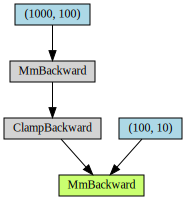

In [28]:
device = torch.device('cpu')

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)
w1 = torch.randn(D_in, H, device=device, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, requires_grad=True)

lr = 1e-6
# Instead of manual loss implementation, Using Torch.nn.<LossFunction>
mse_loss = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD([w1, w2], lr=lr)

y_pred_viz, loss_viz = None, None

for epoch in range(300):
    # Forward Pass
    # Forward pass: compute predicted y using operations on Tensors. Since w1 and
    # w2 have requires_grad=True, operations involving these Tensors will cause
    # PyTorch to build a computational graph, allowing automatic computation of
    # gradients. Since we are no longer implementing the backward pass by hand we
    # don't need to keep references to intermediate values.
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    
    if epoch==1:
        y_pred_viz = make_dot(y_pred)
    
    # Compute loss
    # Instead of manual loss implementation, Using Torch.nn.<LossFunction>
    # loss = (y_pred - y).pow(2).sum()
    loss = mse_loss(y_pred, y)
    print(epoch, loss.item())
    
    if epoch == 1:
        loss_viz = make_dot(loss)
    
    # USE AUTOGRAD
    # to compute backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()
    
    # Using optimizer to step towards gradient descent and zeroing out grad
    optimizer.step()
    optimizer.zero_grad()
y_pred_viz

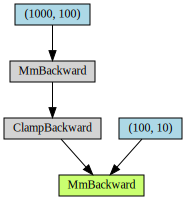

In [31]:
y_pred_viz

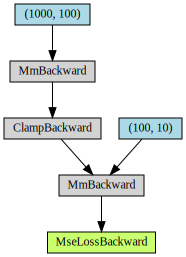

In [32]:
loss_viz

## Using pre-trained models

In [34]:
import torchvision

In [35]:
device = torch.device('cpu')
# Load resnet18 pretrained model
model = torchvision.models.resnet18(pretrained=True)

data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

# Instead of manual loss implementation, Using Torch.nn.<LossFunction>
mse_loss = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

y_pred_viz_ptm, loss_viz_ptm = None, None

for epoch in range(20):
    y_pred = model(data)
    
    if epoch==1:
        y_pred_viz_ptm = make_dot(y_pred)
    
    # Compute loss
    # Instead of manual loss implementation, Using Torch.nn.<LossFunction>
    # loss = (y_pred - y).pow(2).sum()
    loss = mse_loss(y_pred, labels)
    print(epoch, loss.item())
    
    if epoch==1:
        loss_viz_ptm = make_dot(loss)
    
    # USE AUTOGRAD
    # to compute backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()
    
    # Using optimizer to step towards gradient descent and zeroing out grad
    optimizer.step()
    optimizer.zero_grad()

0 1.0504071712493896
1 1.0173265933990479
2 0.9903337359428406
3 0.8686918020248413
4 0.7391840815544128
5 0.6250073313713074
6 0.5292587280273438
7 0.4459177553653717
8 0.3709213137626648
9 0.3074245750904083
10 0.25193753838539124
11 0.20389877259731293
12 0.16185949742794037
13 0.1259889304637909
14 0.0959504023194313
15 0.07155857980251312
16 0.05159658193588257
17 0.036019690334796906
18 0.024251770228147507
19 0.015653541311621666


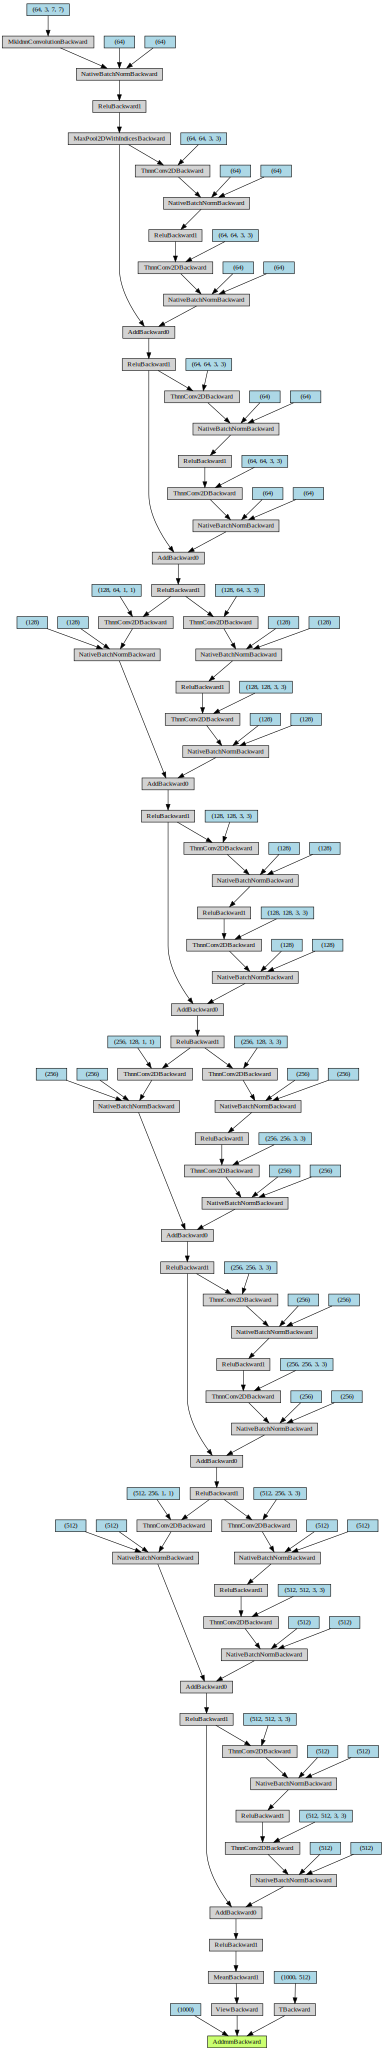

In [36]:
y_pred_viz_ptm

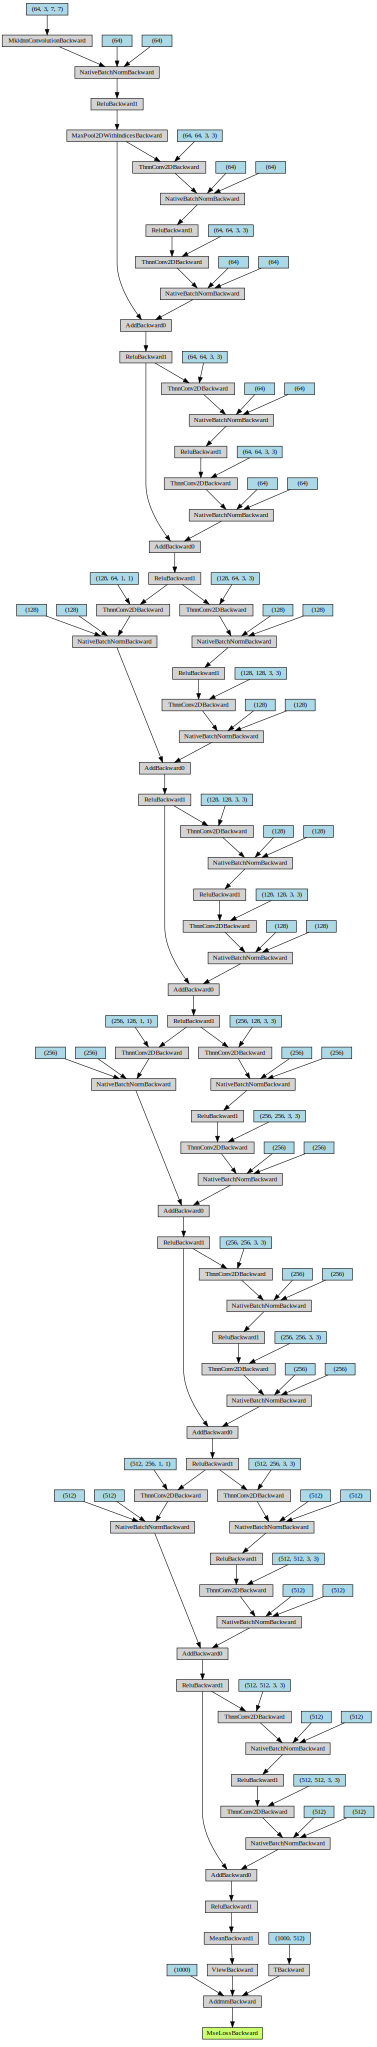

In [37]:
loss_viz_ptm